In [1]:
# pip install textblob

In [2]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("klinikbew.csv")

## Missing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3354 entries, 0 to 3353
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   NameKlinik           3354 non-null   object
 1   Titel                3352 non-null   object
 2   DatumBewertung       3354 non-null   object
 3   Fachbereich          3350 non-null   object
 4   Erfahrungsbericht    3310 non-null   object
 5   Gesamtzufriedenheit  3354 non-null   object
 6   QualitätBeratung     3354 non-null   object
 7   MedizBehandlung      3354 non-null   object
 8   VerwaltungAblaeufe   3354 non-null   object
dtypes: object(9)
memory usage: 236.0+ KB


In [5]:
count = df.isnull().sum().sort_values(ascending=False)
percentage = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])

print('Percentage of missing values of the columns:')

missing_data

Percentage of missing values of the columns:


Count  Percentage
Erfahrungsbericht       44    1.311866
Fachbereich              4    0.119261
Titel                    2    0.059630
NameKlinik               0    0.000000
DatumBewertung           0    0.000000
Gesamtzufriedenheit      0    0.000000
QualitätBeratung         0    0.000000
MedizBehandlung          0    0.000000
VerwaltungAblaeufe       0    0.000000

#### Dropping the missing values

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3304 entries, 0 to 3353
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   NameKlinik           3304 non-null   object
 1   Titel                3304 non-null   object
 2   DatumBewertung       3304 non-null   object
 3   Fachbereich          3304 non-null   object
 4   Erfahrungsbericht    3304 non-null   object
 5   Gesamtzufriedenheit  3304 non-null   object
 6   QualitätBeratung     3304 non-null   object
 7   MedizBehandlung      3304 non-null   object
 8   VerwaltungAblaeufe   3304 non-null   object
dtypes: object(9)
memory usage: 258.1+ KB


In [8]:
df = df.drop_duplicates()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3304 entries, 0 to 3353
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   NameKlinik           3304 non-null   object
 1   Titel                3304 non-null   object
 2   DatumBewertung       3304 non-null   object
 3   Fachbereich          3304 non-null   object
 4   Erfahrungsbericht    3304 non-null   object
 5   Gesamtzufriedenheit  3304 non-null   object
 6   QualitätBeratung     3304 non-null   object
 7   MedizBehandlung      3304 non-null   object
 8   VerwaltungAblaeufe   3304 non-null   object
dtypes: object(9)
memory usage: 258.1+ KB


## Befreien von Zeilen

In [10]:
df = df.replace('\n',' ', regex=True)

In [11]:
df.head()

NameKlinik                       Titel DatumBewertung  \
0  HEH Herzogin Elisabeth Hospital                   Bewertung     09.06.2021   
1  HEH Herzogin Elisabeth Hospital               Weiter so HEH     09.06.2021   
2  HEH Herzogin Elisabeth Hospital                 Superklinik     07.06.2021   
3  HEH Herzogin Elisabeth Hospital  Kranken- oder Hotelzimmer?     25.05.2021   
4  HEH Herzogin Elisabeth Hospital                     Knie OP     11.05.2021   

       Fachbereich                                  Erfahrungsbericht  \
0        Chirurgie  Sehr höfliche und hilfsbereite Mitarbeiter.  S...   
1        Chirurgie  Kann ich nur weiterempfehlen!! Sehr gutes Pfle...   
2       Orthopädie  Bestens durchorganisiert.gutes Personal geht i...   
3  Unfallchirurgie  Bin nach einem Autounfall im HEH gewesen und h...   
4       Orthopädie  Wurde bereits im Sept. 2020 am Knie operiert. ...   

  Gesamtzufriedenheit QualitätBeratung MedizBehandlung VerwaltungAblaeufe  
0              star-6           star-6          star-6             star-6  
1              star-6           star-4          star-6             star-4  
2              star-6           star-6          star-6             star-6  
3              star-6           star-6          star-6             star-6  
4              star-6           star-6          star-6             star-6

### Sterne
Sterne sind Texte, sollten in Zahlen geändert werden

In [12]:
# Düzenle
# np.vectorize(cleanup)(df['Gesamtzufriedenheit'])
# def cleanup(name):
  #  name = name.str.split('-').str[1]
   # return name

In [13]:
df['Gesamt'] = df['Gesamtzufriedenheit'].str.split('-').str[1]
df['QualBeratung'] = df['QualitätBeratung'].str.split('-').str[1]
df['MedBehandlung'] = df['MedizBehandlung'].str.split('-').str[1]
df['VerwalAblaeufe'] = df['VerwaltungAblaeufe'].str.split('-').str[1]

In [14]:
df =df[['NameKlinik', 'Erfahrungsbericht', 'Gesamt']]

In [15]:
df.describe()

NameKlinik  \
count                                                3304   
unique                                                 24   
top     Diana Klinik-Fachklinik für Physikalische Medizin   
freq                                                  326   

                                        Erfahrungsbericht Gesamt  
count                                                3304   3304  
unique                                               3303      4  
top     Die An- und Abreise im Januar 2013 waren perfe...      6  
freq                                                    2   1640

In [16]:
def starConverter(num):
    if int(num) > 3:
        happiness = 'pos'
    else:
        happiness = 'neg'
    return happiness

In [17]:
df['Zufriedenheit'] = df['Gesamt'].apply(starConverter)

In [18]:
df

NameKlinik  \
0                       HEH Herzogin Elisabeth Hospital   
1                       HEH Herzogin Elisabeth Hospital   
2                       HEH Herzogin Elisabeth Hospital   
3                       HEH Herzogin Elisabeth Hospital   
4                       HEH Herzogin Elisabeth Hospital   
...                                                 ...   
3349  Diana Klinik-Fachklinik für Physikalische Medizin   
3350  Diana Klinik-Fachklinik für Physikalische Medizin   
3351  Diana Klinik-Fachklinik für Physikalische Medizin   
3352  Diana Klinik-Fachklinik für Physikalische Medizin   
3353  Diana Klinik-Fachklinik für Physikalische Medizin   

                                      Erfahrungsbericht Gesamt Zufriedenheit  
0     Sehr höfliche und hilfsbereite Mitarbeiter.  S...      6           pos  
1     Kann ich nur weiterempfehlen!! Sehr gutes Pfle...      6           pos  
2     Bestens durchorganisiert.gutes Personal geht i...      6           pos  
3     Bin nach einem Autounfall im HEH gewesen und h...      6           pos  
4     Wurde bereits im Sept. 2020 am Knie operiert. ...      6           pos  
...                                                 ...    ...           ...  
3349  Schematisches Konzept. Man sollte sagen, was m...      6           pos  
3350  Ich war von Maerz 2008 bis Ende April als Pati...      6           pos  
3351  Ich hatte dort einen 7-wöchigen Aufenthalt in ...      0           neg  
3352  Erstmal ist es sehr wichtig zu wissen, dass de...      0           neg  
3353  Ich war 2006 für 6 Wochen Patientin in der Dia...      4           pos  

[3304 rows x 4 columns]

## Groupby

In [19]:
df['NameKlinik'].value_counts()

Diana Klinik-Fachklinik für Physikalische Medizin      326
Agaplesion - Diakonieklinikum Rotenburg                297
DIAKOVERE Henriettenstift                              241
Klinikum Wolfsburg                                     232
Klinik Fallingbostel                                   205
MediClin Klinikum Soltau                               186
AMEOS Klinikum Hildesheim                              171
Klinikum Peine gGmbH                                   145
AMEOS Klinikum Seepark Geestland                       144
HEH Herzogin Elisabeth Hospital                        130
HELIOS Klinik Cuxhaven                                 125
Helios Kliniken Mittelweser - Krankenhaus Nienburg     124
Kreiskrankenhaus Buchholz                              123
KRH Klinikum Agness Karll Laatzen                      118
Klinikum Wahrendorff                                   105
Heidekreis-Klinikum GmbH - Krankenhaus Walsrode        104
Kreiskrankenhaus Winsen                                 

In [20]:
df.groupby('NameKlinik')

Distribution

In [21]:
df

NameKlinik  \
0                       HEH Herzogin Elisabeth Hospital   
1                       HEH Herzogin Elisabeth Hospital   
2                       HEH Herzogin Elisabeth Hospital   
3                       HEH Herzogin Elisabeth Hospital   
4                       HEH Herzogin Elisabeth Hospital   
...                                                 ...   
3349  Diana Klinik-Fachklinik für Physikalische Medizin   
3350  Diana Klinik-Fachklinik für Physikalische Medizin   
3351  Diana Klinik-Fachklinik für Physikalische Medizin   
3352  Diana Klinik-Fachklinik für Physikalische Medizin   
3353  Diana Klinik-Fachklinik für Physikalische Medizin   

                                      Erfahrungsbericht Gesamt Zufriedenheit  
0     Sehr höfliche und hilfsbereite Mitarbeiter.  S...      6           pos  
1     Kann ich nur weiterempfehlen!! Sehr gutes Pfle...      6           pos  
2     Bestens durchorganisiert.gutes Personal geht i...      6           pos  
3     Bin nach einem Autounfall im HEH gewesen und h...      6           pos  
4     Wurde bereits im Sept. 2020 am Knie operiert. ...      6           pos  
...                                                 ...    ...           ...  
3349  Schematisches Konzept. Man sollte sagen, was m...      6           pos  
3350  Ich war von Maerz 2008 bis Ende April als Pati...      6           pos  
3351  Ich hatte dort einen 7-wöchigen Aufenthalt in ...      0           neg  
3352  Erstmal ist es sehr wichtig zu wissen, dass de...      0           neg  
3353  Ich war 2006 für 6 Wochen Patientin in der Dia...      4           pos  

[3304 rows x 4 columns]

NameKlinik                                           Zufriedenheit
AMEOS Klinikum Hildesheim                            neg              63.74
                                                     pos              36.26
AMEOS Klinikum Seepark Geestland                     pos              73.61
                                                     neg              26.39
Agaplesion - Diakonieklinikum Rotenburg              pos              55.56
                                                     neg              44.44
DIAKOVERE Henriettenstift                            pos              60.17
                                                     neg              39.83
Diana Klinik-Fachklinik für Physikalische Medizin    pos              73.31
                                                     neg              26.69
Eilenriede Klinik Hannover                           pos              85.71
                                                     neg              14.29
Elbe Kliniken Stade -

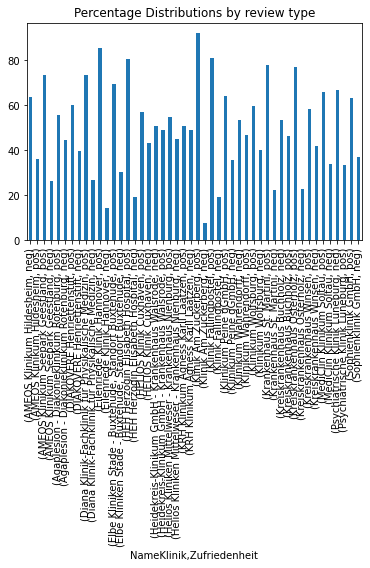

In [22]:
### Checking for the Distribution of Default ###
print(round(df.groupby('NameKlinik').Zufriedenheit.value_counts(normalize=True)*100,2))
round(df.groupby('NameKlinik').Zufriedenheit.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

Independent_var = df.Erfahrungsbericht
Dependent_var = df.Zufriedenheit

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.2, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))

IV_train : 2643
IV_test  : 661
DV_train : 2643
DV_test  : 661


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [25]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[224,  25],
       [ 31, 381]])

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.9152798789712556
Precision :  0.9158244381794661
Recall :  0.9152798789712556


In [31]:
# example = ["Augenscheinlich braucht diese Klinik in Corona-Zeiten Geld und tut alles, um dieses von den Krankenkassen zu bekommen!Patientin war meine 3 Monate alte Tochter. Es handelte sich um eine geplante Operation, die durchaus auch als ambulante OP vorgenommen wird. Den Grund, warum die stationäre Aufnahme notwendig war, konnte mir niemand erläutern!Bei der vorstationären Aufnahme wurde ich daraufhingewiesen, dass ich Windeln und Nahrung für mein Kind selbst mitzubringen hätte. Das Nahrung mitzubringen ist, konnte ich nachvollziehen, da es hier sehr viele verschiedene Angebote gibt und die Klinik unmöglich alle Sorten vorhalten kann! Aber Windeln? Das ist für eine Klinik mit Kinderorthopädie als Fachrichtung nicht nachvollziehbar!Das Zimmer war ein normales Doppelzimmer mit einem Gitterbettchen für meine Tochter und einem Krankenbett für mich. Im Zimmer gab es weder einen Wickelplatz noch Feuchttücher bzw. einen Windeleimer o. Ä. Wickelzubehör!Mehrere Ärzte bzw. Schwestern kannten, trotz Krankenakte in ihren Händen, nicht einmal das Geschlecht meiner Tochter.Nach der OP übten sich die Schwestern auf der Station in vornehmer Zurückhaltung! Niemand interessierte sich für den Gesundheitszustand meiner Tochter! Die verordneten Schmerzmittel wurden 1,5 Stunden zu spät gebracht und interessiert, ob ich diese meiner Tochter gebe oder nicht hat es niemanden!Am Entlassungstag sprachen die meist sehr unfreundlichen Stationsschwestern von einem Verbandswechsel, der absolut nicht notwendig und für die Behandlung meiner Tochter auch nicht vorgesehen war.Die Entlassungspapiere und der Arztbrief für den behandelnden Orthopäden wurden vor der Entlassungsvisite fertig gemacht, obwohl im Arztbrief das Ergebnis der Entlassungsvisite steht! Scheinbar kann in der Klinik jemand hellsehen."]
example=["Viele böse Menschen"]
result = model.predict(example)

print(result)

['neg']
